# Wildfire Prediction Project
## Notebook 3) Baseline Model 0 

In this notebook, I will run a baseline model 0 predicting the Cause

In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, balanced_accuracy_score, ConfusionMatrixDisplay, classification_report

In [11]:
from sklearn.svm import SVC

In [3]:
df = pd.read_csv("../../data/fires_clean_FIPS.csv", index_col = 0)

In [4]:
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIPS_CODE,FIPS_NAME,Shape,DISC_GREG_DATE,CONT_GREG_DATE,DISC_MONTH,DISC_DAY,DISC_DAYOFWEEK,LABEL,FIRE_DURATION
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,61,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...,2004-05-12,2004-05-12 00:00:00.000000000,5,12,2,1,0
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,17,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...,2004-05-31,2004-05-31 00:00:00.000000000,5,31,0,2,0
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,3,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...,2004-06-28,2004-07-03 00:00:00.000000000,6,28,0,1,5
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,3,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...,2004-06-28,2004-07-03 00:00:00.000000000,6,28,0,1,5
5,6,6,FS-1418849,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,5,Amador,b'\x00\x01\xad\x10\x00\x00\xf0<~\x90\xa1\x06^\...,2004-06-30,2004-07-01 00:00:00.000000000,6,30,2,1,1


#### For the basemodel, we will just drop all objects and any numeric categorical features

We know from the EDA notebook that many of the features have over 40% missing values and there are many ID features

In [5]:
df.dtypes

OBJECTID                        int64
FOD_ID                          int64
FPA_ID                         object
SOURCE_SYSTEM_TYPE             object
SOURCE_SYSTEM                  object
NWCG_REPORTING_AGENCY          object
NWCG_REPORTING_UNIT_ID         object
NWCG_REPORTING_UNIT_NAME       object
SOURCE_REPORTING_UNIT          object
SOURCE_REPORTING_UNIT_NAME     object
FIRE_YEAR                       int64
DISCOVERY_DATE                float64
DISCOVERY_DOY                   int64
STAT_CAUSE_CODE               float64
FIRE_SIZE                     float64
FIRE_SIZE_CLASS                object
LATITUDE                      float64
LONGITUDE                     float64
OWNER_CODE                    float64
OWNER_DESCR                    object
STATE                          object
COUNTY                         object
FIPS_CODE                       int64
FIPS_NAME                      object
Shape                          object
DISC_GREG_DATE                 object
CONT_GREG_DA

In [6]:
df_base = df[['FIRE_YEAR', 'DISCOVERY_DOY', 'STAT_CAUSE_CODE', 'FIRE_SIZE', 'LATITUDE', 'LONGITUDE', 'DISC_MONTH', 'DISC_DAY', 'FIRE_DURATION', 'DISC_DAYOFWEEK']]

### Check that all is clean

In [7]:
df_base.dtypes

FIRE_YEAR            int64
DISCOVERY_DOY        int64
STAT_CAUSE_CODE    float64
FIRE_SIZE          float64
LATITUDE           float64
LONGITUDE          float64
DISC_MONTH           int64
DISC_DAY             int64
FIRE_DURATION        int64
DISC_DAYOFWEEK       int64
dtype: object

In [8]:
df_base.shape

(84893, 10)

### Baseline Model
- using only the date, size, duration, and location of fire

In [9]:
X = df_base.drop('STAT_CAUSE_CODE', axis = 1)
y = df_base['STAT_CAUSE_CODE']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

since we only have numeric features the pipeline is simple

#### Random Forest

In [56]:
numeric_transform = Pipeline([('impute_mean', SimpleImputer(strategy='mean')), ('scaling', StandardScaler())])

pipeline = Pipeline([('preprocessing', numeric_transform), ('model', RandomForestClassifier())])

pipeline.fit(X_train, y_train)
score = pipeline.score(X_test, y_test)          
print(f'Test set score: {score}')

Test set score: 0.6486247717769009


In [57]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.80      0.93      0.86      6778
         2.0       0.49      0.57      0.53      2481
         3.0       0.27      0.09      0.13       783
         4.0       0.57      0.51      0.54      1999
         5.0       0.57      0.64      0.60      2464
         6.0       0.56      0.18      0.27       102
         7.0       0.49      0.33      0.40      1398
         8.0       0.31      0.12      0.17       658
        10.0       0.43      0.16      0.24        55
        11.0       0.49      0.17      0.25       223
        12.0       0.00      0.00      0.00        38

    accuracy                           0.65     16979
   macro avg       0.45      0.34      0.36     16979
weighted avg       0.62      0.65      0.62     16979



In [58]:
f1_score(y_pred, y_test, average='weighted')

0.6753466479768687

In [59]:
balanced_accuracy_score(y_test, y_pred)

0.336718559663519

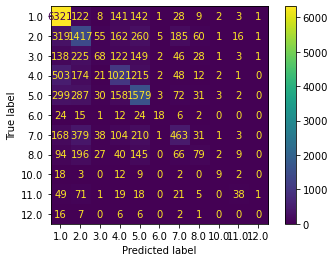

In [60]:
#make bigger
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

#### SVM Algorithm

In [13]:
numeric_transform = Pipeline([('impute_mean', SimpleImputer(strategy='mean')), ('scaling', StandardScaler())])
pipeline1 = Pipeline([('preprocessing', numeric_transform), ('model', SVC(gamma='auto'))])

pipeline1.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('impute_mean', SimpleImputer()),
                                 ('scaling', StandardScaler())])),
                ('model', SVC(gamma='auto'))])

In [14]:
score = pipeline1.score(X_test, y_test)          
print(f'Test set score: {score}')

Test set score: 0.5525060368690735


In [15]:
y_pred1 = pipeline1.predict(X_test) 
f1_score(y_pred1, y_test, average='weighted')

0.6228213356122976

In [16]:
balanced_accuracy_score(y_test, y_pred1)

0.20497502415580493

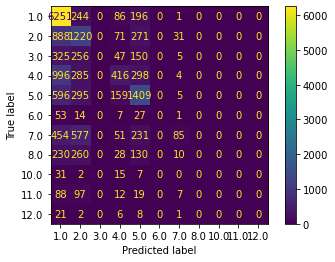

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)

In [20]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         1.0       0.63      0.92      0.75      6778
         2.0       0.38      0.49      0.43      2481
         3.0       0.00      0.00      0.00       783
         4.0       0.46      0.21      0.29      1999
         5.0       0.51      0.57      0.54      2464
         6.0       0.00      0.00      0.00       102
         7.0       0.57      0.06      0.11      1398
         8.0       0.00      0.00      0.00       658
        10.0       0.00      0.00      0.00        55
        11.0       0.00      0.00      0.00       223
        12.0       0.00      0.00      0.00        38

    accuracy                           0.55     16979
   macro avg       0.23      0.20      0.19     16979
weighted avg       0.48      0.55      0.48     16979



C:\Users\3_hal\anaconda3\envs\lighthouse_env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\3_hal\anaconda3\envs\lighthouse_env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\3_hal\anaconda3\envs\lighthouse_env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

#### XGBoost
start at 0?

In [26]:
from xgboost import XGBClassifier

C:\Users\3_hal\anaconda3\envs\lighthouse_env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [27]:
# start at 0 and convert from float to int
y_train_xg = (y_train - 1).astype('int64')
y_test_xg = (y_test - 1).astype('int64')

In [30]:
numeric_transform = Pipeline([('impute_mean', SimpleImputer(strategy='mean')), ('scaling', StandardScaler())])

pipeline2 = Pipeline([('preprocessing', numeric_transform), ('model', XGBClassifier(eval_metric= 'merror', objective='multi:softmax',use_label_encoder=True))])

In [31]:
pipeline2.fit(X_train, y_train_xg)

C:\Users\3_hal\anaconda3\envs\lighthouse_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('impute_mean', SimpleImputer()),
                                 ('scaling', StandardScaler())])),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eval_metric='merror', gamma=0, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=None, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [32]:
score = pipeline2.score(X_test, y_test_xg)          
print(f'Test set score: {score}')

Test set score: 0.6535131633193946


In [37]:
y_pred2 = pipeline2.predict(X_test) 
print(f1_score(y_pred2, y_test_xg, average='weighted'), balanced_accuracy_score(y_test_xg, y_pred2))

0.6816271274399095 0.35286917229550124


### Basemodel Results

In [38]:
results = pd.DataFrame({'Model': [0,0,0], 
                        'Classifier': ['Random Forest', 'SVC', 'XGBoost'], 
                        'Accuracy': [0.6467400907002768, 0.6486836680605453, 0.6535131633193946], 
                        'Balanced Score': [0.336718559663519,0.20497502415580493, 0.35286917229550124], 
                        'F1 Score': [0.6753466479768687,0.6228213356122976, 0.6816271274399095]})

In [39]:
results

,Model,Classifier,Accuracy,Balanced Score,F1 Score
0,0,Random Forest,0.646740,0.336719,0.675347
1,0,SVC,0.648684,0.204975,0.622821
2,0,XGBoost,0.653513,0.352869,0.681627


In [40]:
results.to_csv("../../output/results.csv")